In [1]:
import yaml
import torch
import os
from torch import optim
import matplotlib.pyplot as plt

from data.datasets import get_data, flatten_dataset
from models.diffusion import *
from models.latent import *
from utils import *
from tensor_utils import *

from specmf.models import Graph

torch.set_default_dtype(torch.float32)
device = torch.device("cpu")

In [2]:
experiment_log_path = "saved_models/experiments_log.yml"

# Load configuration and checkpoint
with open(experiment_log_path, "r") as f:
    experiments_log = yaml.safe_load(f)

experiment_names = list(experiments_log.keys())
print(experiment_names)

['bouncy-narwhal-20250120091057', 'quirky-sloth-20250123131338']


In [3]:
experiment_name = experiment_names[-1]
model, diffusion, optimizer, config = load_experiment(experiment_name)


Loading MNIST dataset...
Sampling 1 images...


In [4]:
# Load data to infer input shape
X = get_data(data_name=config["data"]["data_name"], n_samples=1)
_, dim1, dim2 = flatten_dataset(X, return_shape=True)[1]


Loading MNIST dataset...
Sampling 1 images...


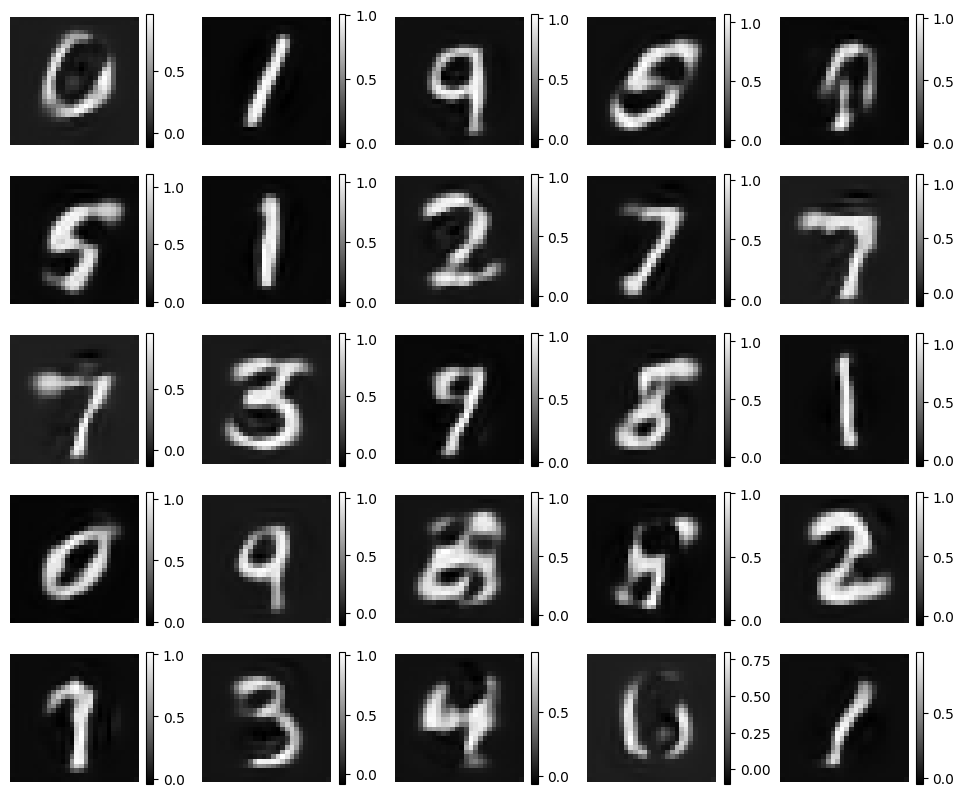

In [5]:
# Generate gaussian noise and denoise it to latent space embeddings z 
x_samples = diffusion.reverse(
    model,
    num_samples=25,
    in_dim=config["data"]["latent_dim"],
    device=device,
    denormalize=True,
    decode=True,
).detach().cpu().numpy()

n_rows, n_cols = 5, 5
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 10))

for i in range(n_rows * n_cols):
    ax = axes[i // n_cols, i % n_cols]
    sample = x_samples[i].reshape(28, 28)
    sample_plot = ax.imshow(sample, cmap="gray")
    ax.axis("off")
    fig.colorbar(sample_plot)